<a href="https://colab.research.google.com/github/shashidharraju1648/Chat_server-Using-Python/blob/main/data_bitcoin_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['bitcoin', 'ethereum', 'tether', 'binancecoin', 'usd-coin', 'ripple', 'cardano', 'solana', 'terra-luna', 'avalanche-2', 'polkadot', 'dogecoin', 'binance-usd', 'terrausd', 'shiba-inu', 'wrapped-bitcoin', 'crypto-com-chain', 'matic-network', 'dai', 'staked-ether', 'litecoin', 'near', 'cosmos', 'chainlink', 'ftx-token', 'bitcoin-cash', 'tron', 'ethereum-classic', 'algorand', 'okb', 'leo-token', 'stellar', 'axie-infinity', 'uniswap', 'hedera-hashgraph', 'elrond-erd-2', 'internet-computer', 'decentraland', 'vechain', 'the-sandbox', 'monero', 'fantom', 'filecoin', 'compound-ether', 'waves', 'tezos', 'theta-token', 'klay-token', 'thorchain', 'frax']
                 timestamp         price
0  2022-03-24 20:02:13.134  43909.946323
1  2022-03-24 21:01:40.330  43844.788720
2  2022-03-24 22:02:43.482  43951.126978
3  2022-03-24 23:00:39.063  43922.725345
4  2022-03-25 00:02:35.804  43936.096235
5  2022-03-25 01:03:38.966  43935.935608
6  2022-03-25 02:02:46.827  44170.491969
7  2022-03-25 03:00:

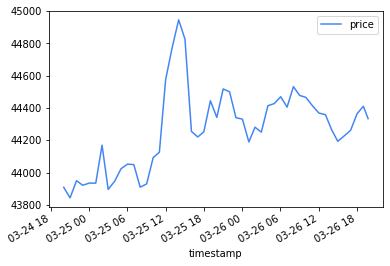

In [1]:
from curses import COLOR_BLUE
from ipaddress import collapse_addresses
from time import time
from urllib import response
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt




def available_crypto():
    url = f'https://api.coingecko.com/api/v3/coins'

    response = requests.get(url)
    data = response.json()


    crypto_ids = []


    for asset in data:
        crypto_ids.append(asset['id'])

    return crypto_ids

print(available_crypto())


def get_market_chart(coin_id='bitcoin',vs_currency='usd',days='max', interval='daily'):
    crypto_ids = available_crypto()


    if coin_id in crypto_ids:
        url = f'https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart'
        payload = {'vs_currency': vs_currency, 'days': days, 'interval': interval}
        response =  requests.get(url,params=payload)
        data = response.json()

        timestamp_list, price_list = [], []

        for price in data['prices']:
            timestamp_list.append(datetime.datetime.fromtimestamp(price[0]/1000))
            price_list.append(price[1])


        raw_data ={
            'timestamp': timestamp_list,
            'price': price_list
        }

        df = pd.DataFrame(raw_data)

        return df

    
    else:
        print("not avaoilble")
        print(crypto_ids)



#market_info = get_market_chart('bitcoin','usd', '3800')
market_info = get_market_chart(days='2', interval='hourly')

print(market_info)


market_info.plot(y='price', x='timestamp', color='#4285F4')
plt.show()

